### Corona Cases Forecasting for Germany on a County Level

##### Get data:
RKI_Corona_Landkreise.csv:

GEN                   | NUTS  | cases | deaths | county
--------------------- | ----- | ----- | ------ | ----------
Flensburg             | DEF06 | 21    | 0      |  SK Flensburg <br>
Herzogtum Lauenburg   | DEF07 | 15    | 0      |  LK Herzogtum Lauenburg


df_time: 

Landkreis                 | AnzahlFall | AnzahlTodesfall | Meldedatum               | IdLandkreis | NUTS3  | Bevoelkerung
------------------------- | ---------- | --------------- | ------------------------ | ----------- | ------ | ------------
SK Magdeburg              | 2          | 0               | 2020-03-18T00:00:00.000Z | 15003       | NaN    | NaN
SK Magdeburg              | 1          | 0               | 2020-03-12T00:00:00.000Z | 15003       | NaN    | NaN
LK Altmarkkreis Salzwedel | 1          | 0               | 2020-03-12T00:00:00.000Z | 15081       | NaN    | NaN

In [261]:
import pandas as pd 
#data = pd.read_csv("data/RKI_Corona_Landkreise.csv") 
df_time = pd.read_csv("data/df_time.csv") 
df_time.head(2)
#data.describe()

,IdBundesland,Bundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,ObjectId,Meldedatum,IdLandkreis,NUTS3,Flaeche,Bevoelkerung,maennlich,weiblich,Dichte
0,15,Sachsen-Anhalt,SK Magdeburg,A35-A59,M,2,0,154936,2020-03-18T00:00:00.000Z,15003,NaN,NaN,NaN,NaN,NaN,NaN
1,15,Sachsen-Anhalt,SK Magdeburg,A35-A59,W,1,0,154937,2020-03-12T00:00:00.000Z,15003,NaN,NaN,NaN,NaN,NaN,NaN


##### Get additional information about the Counties:
e.g. population density, public transport information, gender distribution, age distribution

### Visualize data based on county:
How to: https://www.kdnuggets.com/2020/01/open-data-germany-maps-viz.html

In [207]:
import geopandas as gpd
import descartes # to plot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline

#### Load county shape information

https://public.opendatasoft.com/explore/dataset/landkreise-in-germany/export/

most important: cca_2 (= county identifier) and geometry:

name_2                   | cca_2  | geometry
------------------------ | ------ | -------------------------------------------------
Freiburg im Breisgau     | 08311  | POLYGON ((7.790447235107478 47.96881103515624,...
Dillingen an der Donau   | 09773  | POLYGON ((10.6144847869873 48.75083541870145, ...


In [208]:
county_df = gpd.read_file('data/landkreise-in-germany.shp', encoding='utf-8', dtype={'cca_2': str})
county_df.head(2)

,id_0,iso,name_0,id_1,name_1,id_2,name_2,hasc_2,ccn_2,cca_2,type_2,engtype_2,nl_name_2,varname_2,geometry
0,86.0,DEU,Germany,1.0,Baden-Württemberg,12.0,Freiburg im Breisgau,DE.BW.FB,0.0,08311,Stadtkreis,District,None,None,"POLYGON ((7.790447235107478 47.96881103515624,..."
1,86.0,DEU,Germany,2.0,Bayern,68.0,Dillingen an der Donau,DE.BY.DD,0.0,09773,Landkreis,District,None,None,"POLYGON ((10.6144847869873 48.75083541870145, ..."


In [209]:
plt.rcParams['figure.figsize'] = [16, 11]
# Get lat and lng of Germany's main cities. 
top_cities = {
    'Berlin': (13.404954, 52.520008), 
    'Cologne': (6.953101, 50.935173),
    'Düsseldorf': (6.782048, 51.227144),
    'Frankfurt am Main': (8.682127, 50.110924),
    'Hamburg': (9.993682, 53.551086),
    'Leipzig': (12.387772, 51.343479),
    'Munich': (11.576124, 48.137154),
    'Dortmund': (7.468554, 51.513400),
    'Stuttgart': (9.181332, 48.777128),
    'Nuremberg': (11.077438, 49.449820),
    'Hannover': (9.73322, 52.37052)
}

# Color by state (= first two numbers in cca_2):
county_df = county_df \
    .assign(first_dig_cca_2 = lambda x: x['cca_2'].str.slice(start=0, stop=2))

# convert first digits of cca_2 to float
county_df = county_df.astype({'first_dig_cca_2': 'float64'})

# kick non numeric cca_2 value:
county_df = county_df.drop(county_df.loc[county_df['first_dig_cca_2'].isna()].index)

#### Merge Geometric and Corona Information

In [262]:
# Aggregate Corona Information over IDLandkreis
df_time  = df_time.astype({'IdLandkreis': 'float64'})
df_agg = df_time.groupby('IdLandkreis').sum() 

# prepare merge column for geometry information
county_df = county_df.astype({'cca_2': 'float64'})

df = pd.merge(left=county_df , right= df_agg, how='left', left_on='cca_2', right_on='IdLandkreis')
df.head()

,id_0,iso,name_0,id_1,name_1,id_2,name_2,hasc_2,ccn_2,cca_2,type_2,engtype_2,nl_name_2,varname_2,geometry,first_dig_cca_2,IdBundesland,AnzahlFall,AnzahlTodesfall,ObjectId
0,86.0,DEU,Germany,1.0,Baden-Württemberg,12.0,Freiburg im Breisgau,DE.BW.FB,0.0,8311.0,Stadtkreis,District,None,None,"POLYGON ((7.790447235107478 47.96881103515624,...",8.0,504.0,150.0,0.0,9540342.0
1,86.0,DEU,Germany,2.0,Bayern,68.0,Dillingen an der Donau,DE.BY.DD,0.0,9773.0,Landkreis,District,None,None,"POLYGON ((10.6144847869873 48.75083541870145, ...",9.0,45.0,6.0,0.0,767980.0
2,86.0,DEU,Germany,2.0,Bayern,107.0,Nürnberg,DE.BY.NR,0.0,9564.0,Kreisfreie Stadt,District,None,None,(POLYGON ((11.18831062316894 49.38963317871099...,9.0,360.0,67.0,0.0,6130820.0
3,86.0,DEU,Germany,2.0,Bayern,110.0,Neumarkt in der Oberpfalz,DE.BY.NO,0.0,9373.0,Landkreis,District,None,None,"POLYGON ((11.46063137054449 49.42603683471707,...",9.0,135.0,18.0,0.0,2295360.0
4,86.0,DEU,Germany,2.0,Bayern,122.0,Rosenheim,DE.BY.RH,0.0,9163.0,Kreisfreie Stadt,District,None,None,"POLYGON ((12.05431365966808 47.81771087646483,...",9.0,9.0,1.0,0.0,152180.0


### Plot Map

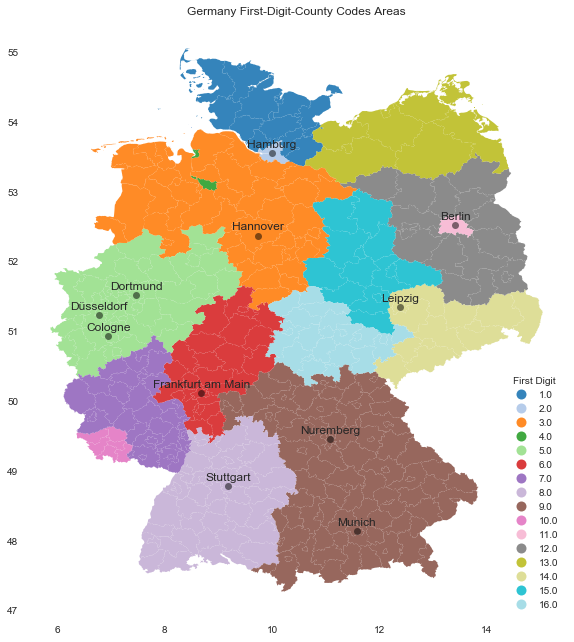

In [252]:
# Plot Counties:
fig, ax = plt.subplots()

county_df.plot(
    ax=ax, 
    column='first_dig_cca_2', 
    categorical=True, 
    legend=True, 
    legend_kwds={'title':'First Digit', 'loc':'lower right'},
    cmap='tab20',
    alpha=0.9
)

for c in top_cities.keys():

    ax.text(
        x=top_cities[c][0], 
        y=top_cities[c][1] + 0.08, 
        s=c, 
        fontsize=12,
        ha='center', 
    )

    ax.plot(
        top_cities[c][0], 
        top_cities[c][1], 
        marker='o',
        c='black', 
        alpha=0.5
    )

ax.set(
    title='Germany First-Digit-County Codes Areas', 
    aspect=1.3,
    facecolor='white'
);

#### Color by cases

C:\Users\henri\Anaconda3\lib\site-packages\matplotlib\colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


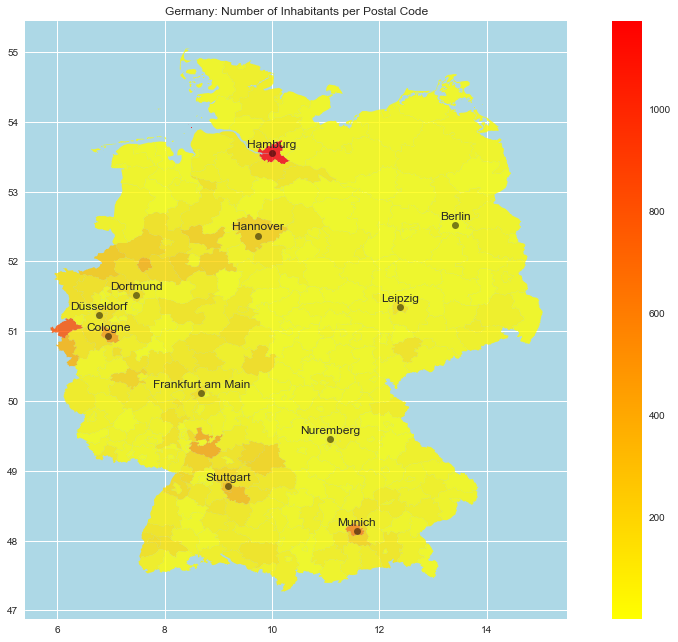

In [265]:
fig, ax = plt.subplots()

df.plot(
    ax=ax, 
    column='AnzahlFall', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
    alpha=0.8
)

for c in top_cities.keys():

    ax.text(
        x=top_cities[c][0], 
        y=top_cities[c][1] + 0.08, 
        s=c, 
        fontsize=12,
        ha='center', 
    )

    ax.plot(
        top_cities[c][0], 
        top_cities[c][1], 
        marker='o',
        c='black', 
        alpha=0.5
    )
    
ax.set(
    title='Germany: Number of Corona cases per County', 
    aspect=1.3, 
    facecolor='lightblue'
);